In [1]:
#loading the libraries for mathematical operations and data processing
import numpy as np 
import pandas as pd

c:\users\c.jalindar.bhise\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\c.jalindar.bhise\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\c.jalindar.bhise\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#loading the data
data=pd.read_csv('train.csv')

In [3]:
data.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\users\c.jalindar.bhise\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Labels', ylabel='count'>

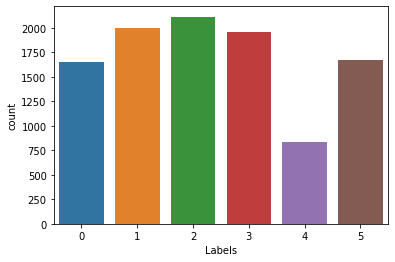

In [5]:
#Distribution of labels
sns.countplot(data['Labels'])

In [6]:
#combining the text and text_tag columns as both of them impacts our target
data['NewText']=data['Text']+' '+data['Text_Tag']

In [7]:
#loading text preprocessing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import unicodedata,re
from nltk.corpus import stopwords

In [8]:
#downloading nltk packages for further processing
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/words')
except LookupError:
     nltk.download('words')   
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

In [9]:
# Functions required for preprocessing inputs
def tokenize_text(text):
    return word_tokenize(text)
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems
def _remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            word=word.replace('xa0','')
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

def _remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def _specific_stopwords(words):
    """Remove stop words from list of tokenized words"""
    sw=spec_sw
    #print(words)
    new_words = [w for w in words if w.lower() not in sw]
    #print (new_words)
    return new_words

def _remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in nltk.corpus.stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
def join_text(words):
    return ' '.join(words)

In [10]:
#pre-processing the input data
clean_data=data["NewText"].astype('str').apply(tokenize_text).apply(_remove_non_ascii).apply(_remove_punctuation).apply(_remove_stopwords).apply(lemmatize_verbs).apply(join_text)

In [11]:
#getting tokens of the text
tokens = word_tokenize(' '.join(list(clean_data.values)).lower())

In [12]:
#obtaining frequency distribution using nltk
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)

11434


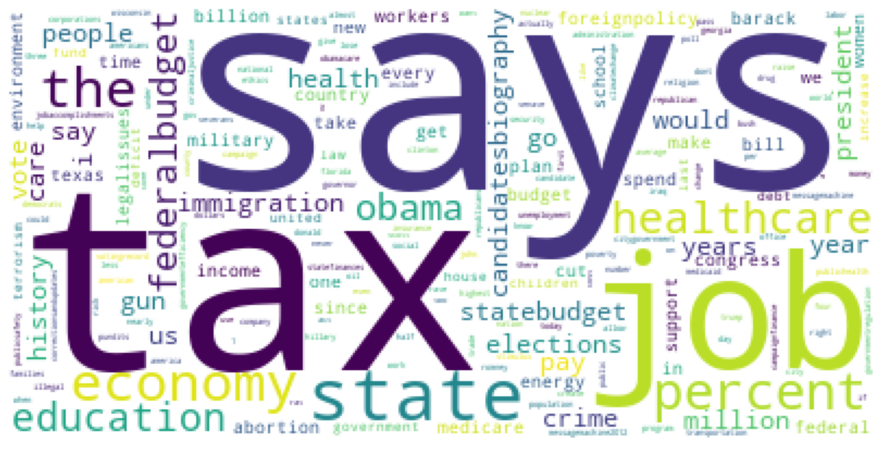

In [13]:
#building wordcloud for the input text of the news
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequency_dist)
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# converting data to vectors
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
#Converting the processed text into tfidf format
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(clean_data)

In [17]:
#Label encoding the traget column
labelencoder = LabelEncoder()

Y = labelencoder.fit_transform(data.Labels)

In [18]:
X.shape , Y.shape

((10240, 11401), (10240,))